# Proyecto Minería de Datos: series temporales


## Introducción: Presentación de la serie a analizar

La serie de datos presentada proviene de un esfuerzo de investigación y ha sido cuidadosamente limpiada para asegurar su calidad como un conjunto de datos de series temporales. Esta información se ha recopilado con el fin de ser compartida con la comunidad de Kaggle, animando a los usuarios a valorar positivamente el conjunto de datos si lo encuentran útil.

Este conjunto de datos mide el clima de la ciudad de Semarang y ha sido obtenido del sitio web https://dataonline.bmkg.go.id/home. La estación responsable de la recopilación de los datos es la Stasiun Klimatologi Jawa Tengah. El rango de fechas cubierto por el conjunto de datos se extiende desde el 1 de enero de 2020 hasta el 31 de diciembre de 2023, proporcionando una amplia ventana de observación del clima en esta región.

Las columnas del conjunto de datos incluyen una variedad de mediciones climáticas:

* Tanggal: Marca cada día en el formato día-mes-año. No se configura como tipo datetime por defecto, por lo que los usuarios necesitarán convertirlo si desean utilizarlo en análisis temporales.
* Tn: La temperatura mínima registrada en grados Celsius.
* Tx: La temperatura máxima registrada en grados Celsius.
* Tavg: La temperatura media calculada en grados Celsius.
* RH_avg: La humedad media registrada en porcentaje.
* RR: La cantidad de precipitación registrada en milímetros.
* ss: La duración de la luz solar en horas.
* ff_x: La velocidad máxima del viento en metros por segundo.
* ddd_x: La dirección del viento a la velocidad máxima en grados.
* ff_avg: La velocidad media del viento en metros por segundo.
* ddd_car: La dirección del viento más común en grados.

Este conjunto de datos ofrece una oportunidad valiosa para analizar tendencias climáticas, patrones estacionales, y para realizar una variedad de estudios ambientales y climáticos con respecto a la región de Semarang durante el período mencionado.

## Representación gráfica y descomposición estacional

Comenzamos importando las librerías necesarias:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\pablo\AppData\Local\Temp\ipykernel_20028\2317474185.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Ruta del directorio de trabajo deseado
directorio_trabajo = 'C:\\Users\\pablo\\OneDrive\\Documentos\\GitHub\\MasterBigDataML-DataMiningIV'
# Cambiar al directorio de trabajo deseado
os.chdir(directorio_trabajo)
df = pd.read_excel('src\\data\\Semarang_dataset.xlsx')

Visualizamos las primeras 20 filas del dataframe:

In [3]:
df.head(10)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2020,24.2,31.4,27.0,88,9.6,3.6,6,280,4,W
1,02-01-2020,24.0,31.0,27.4,87,16.7,3.4,6,280,3,W
2,03-01-2020,24.8,32.2,28.4,84,2.0,2.5,7,270,3,W
3,04-01-2020,22.0,31.4,27.1,90,36.6,4.6,8,270,2,C
4,05-01-2020,25.4,30.4,26.8,92,3.7,0.8,6,270,2,C
5,06-01-2020,24.6,29.6,26.3,92,20.3,0.2,4,360,2,C
6,07-01-2020,23.6,30.4,26.7,94,28.8,3.2,5,280,2,C
7,08-01-2020,24.6,30.2,26.9,93,28.0,3.1,5,360,2,C
8,09-01-2020,24.2,30.2,26.4,90,13.5,2.1,4,260,2,C
9,10-01-2020,25.2,29.8,26.9,93,2.5,2.9,6,290,2,W


Comprobamos el tipo de las variables:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  1355 non-null   object 
 1   Tn       1355 non-null   float64
 2   Tx       1355 non-null   float64
 3   Tavg     1355 non-null   float64
 4   RH_avg   1355 non-null   int64  
 5   RR       1331 non-null   float64
 6   ss       1355 non-null   float64
 7   ff_x     1355 non-null   int64  
 8   ddd_x    1355 non-null   int64  
 9   ff_avg   1355 non-null   int64  
 10  ddd_car  1355 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 116.6+ KB


Debemos cambiar el tipo de dato de la columna Date a tipo ``date``. Para nuestro estudio solo tomamos los valores de apertura, cierre, máximo y mínimo diario:

In [5]:
# Convertir la columna 'Tanggal' a datetime con el formato correcto
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')
df = df[['Tanggal','Tavg','RH_avg']]
# Establecer 'Tanggal' como índice del DataFrame
df.set_index('Tanggal', inplace=True)

In [6]:
df

,Tavg,RH_avg
Tanggal,,
2020-01-01,27.0,88
2020-01-02,27.4,87
2020-01-03,28.4,84
2020-01-04,27.1,90
2020-01-05,26.8,92
...,...,...
2023-12-27,30.9,69
2023-12-28,30.5,72
2023-12-29,31.5,69


Representamos a continuación la serie temporal:

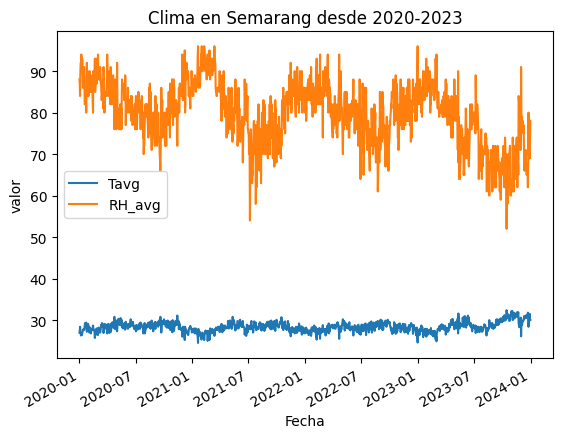

In [7]:
df.plot()
# Add legend and labels
plt.title('Clima en Semarang desde 2020-2023')
plt.xlabel('Fecha')
plt.ylabel('valor')
# Show the plot
plt.show()

Vamos a hacer una serie temporal para cada variable:

In [8]:
S_temp = df['Tavg']
S_hum = df['RH_avg']

### Descomposición estacional

Vamos a ver primero, de cara a elegir un modelo aditivo o multiplicativo, si presenta valores nulos la serie temporal.

In [9]:
df.describe()

,Tavg,RH_avg
count,1355.000000,1355.000000
mean,28.359926,79.894465
std,1.161728,7.465326
min,24.500000,52.000000
25%,27.600000,75.000000
50%,28.300000,81.000000
75%,29.000000,85.000000
max,32.400000,96.000000


Como vemos, no hay valores nulos en las variables de estudio, se puede usar modelo multiplicativo. Usamos un periodo anual (12) y la función seasonal_decompose de la lubrería ``statsmodels``:

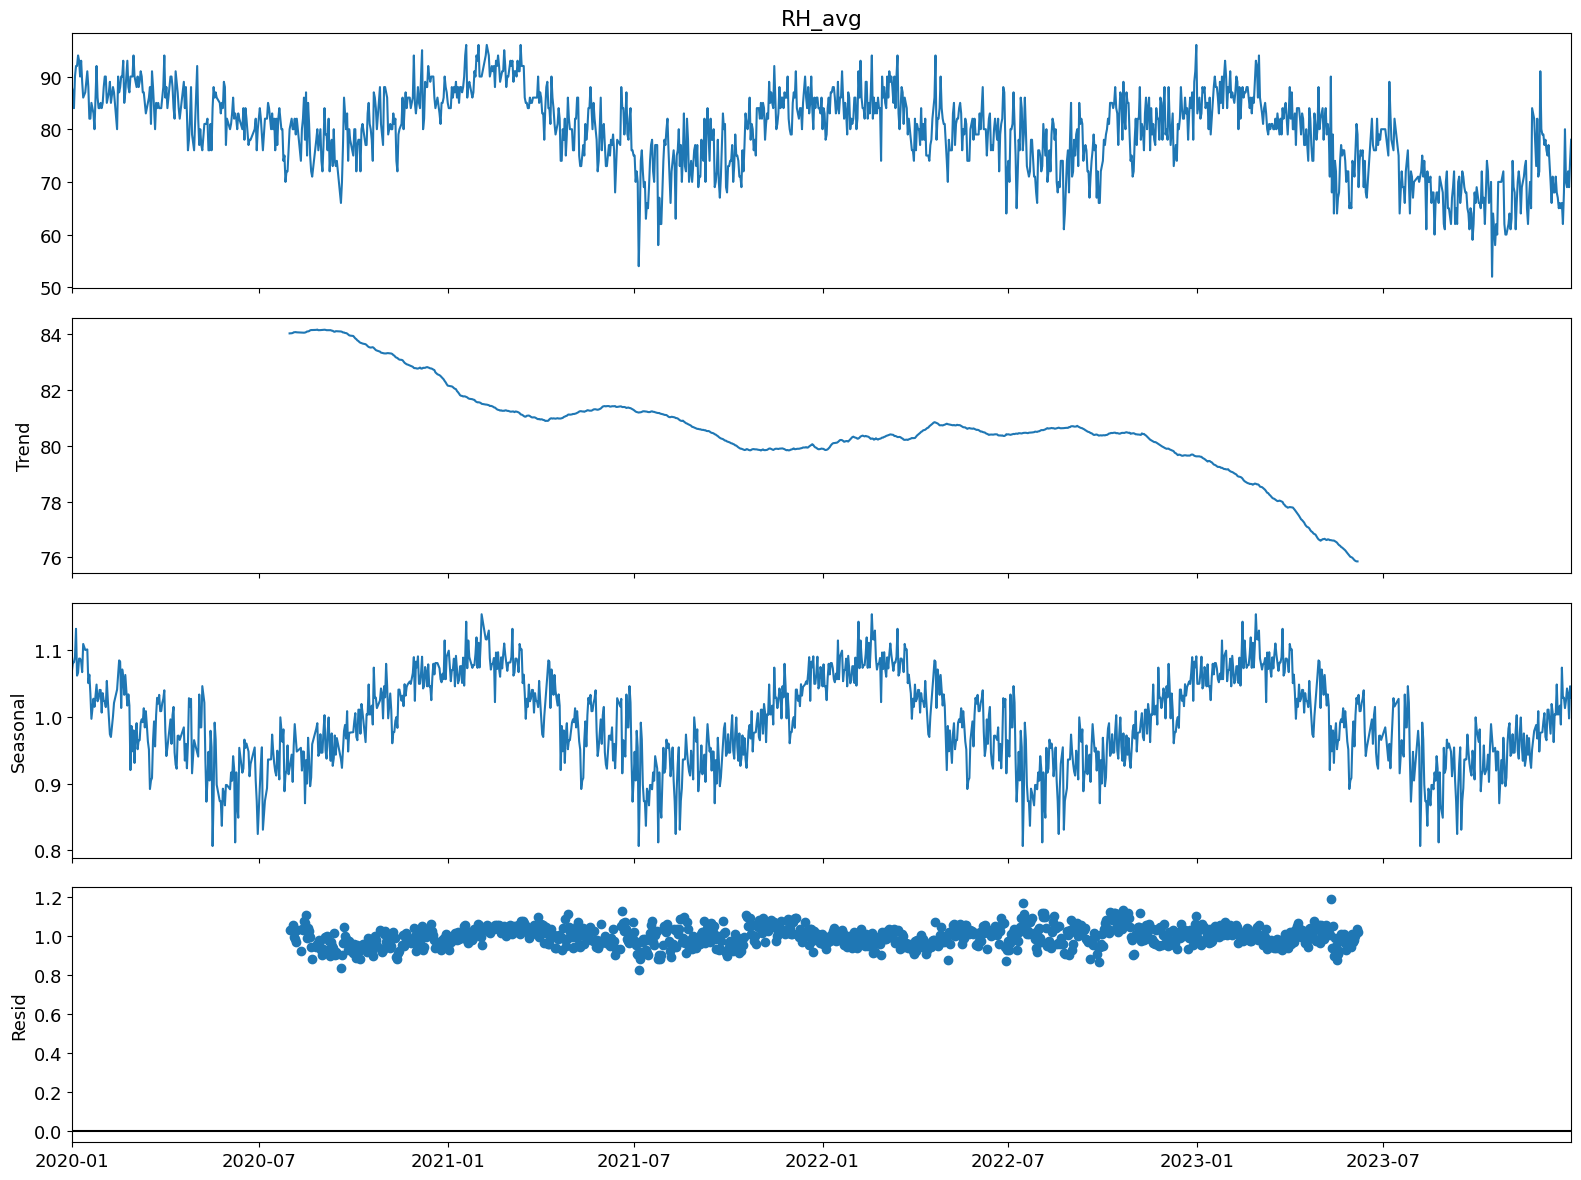

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

humidity_series = df['RH_avg'].squeeze()  # Asegúrate de que 'df' ya tiene el índice de fecha

# Descomposición multiplicativa para la serie de humedad
mult_decomposition = seasonal_decompose(humidity_series, model='multiplicative', period=365)

# Configurando el tamaño para los gráficos
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

# Graficando los componentes descompuestos de la serie temporal
fig = mult_decomposition.plot()
plt.show()

Basándonos en el gráfico que has proporcionado, se han obtenido las siguientes conclusiones sobre la descomposición estacional de los datos de humedad para la ciudad de Semarang:

* Primer gráfico (superior): Muestra los datos originales de humedad (etiquetados como 'RH_avg'), los cuales fluctúan alrededor de un nivel sin mostrar una tendencia clara a largo plazo de aumento o disminución.

* Segundo gráfico: Presenta el componente de 'Tendencia' de los datos. Parece haber una tendencia muy leve a la disminución de la humedad a lo largo del período de 2020 a 2023.

* Tercer gráfico: Representa el componente 'Estacional'. Aquí se puede observar un patrón regular que se repite cada año, indicando las fluctuaciones estacionales en los niveles de humedad.

* Cuarto gráfico (inferior): Muestra el componente 'Residual', que corresponde al ruido o las irregularidades en los datos después de haber eliminado la tendencia y el componente estacional. Los residuos son relativamente estables y centrados alrededor de 1, lo que sugiere que el modelo multiplicativo es adecuado para estos datos.

El componente de tendencia sugiere que podría haber una disminución muy lenta en la humedad promedio a lo largo de estos años. El componente estacional muestra la variabilidad dentro del año, lo que podría estar relacionado con las estaciones específicas, como la temporada de lluvias o la temporada seca. El gráfico de residuales no muestra patrones o valores atípicos evidentes, lo que indica que el modelo ha capturado la estacionalidad y la tendencia de manera razonablemente buena.

Si el objetivo es estudiar la estacionalidad, el tercer gráfico es de especial interés. Proporciona una imagen clara de cómo cambia la humedad a lo largo del año. Si se observa un patrón consistente que se repite cada año en el mismo periodo, eso es una fuerte indicación de la estacionalidad en los datos.

In [11]:
print(mult_decomposition.seasonal[:365])

Tanggal
2020-01-01    1.069328
2020-01-02    1.081665
2020-01-03    1.082075
2020-01-04    1.090216
2020-01-05    1.132504
                ...   
2021-02-23    1.072962
2021-02-24    1.093699
2021-02-25    1.110449
2021-02-26    1.093780
2021-02-27    1.082054
Name: seasonal, Length: 365, dtype: float64


Calculamos la serie ajustada estacionalmente:

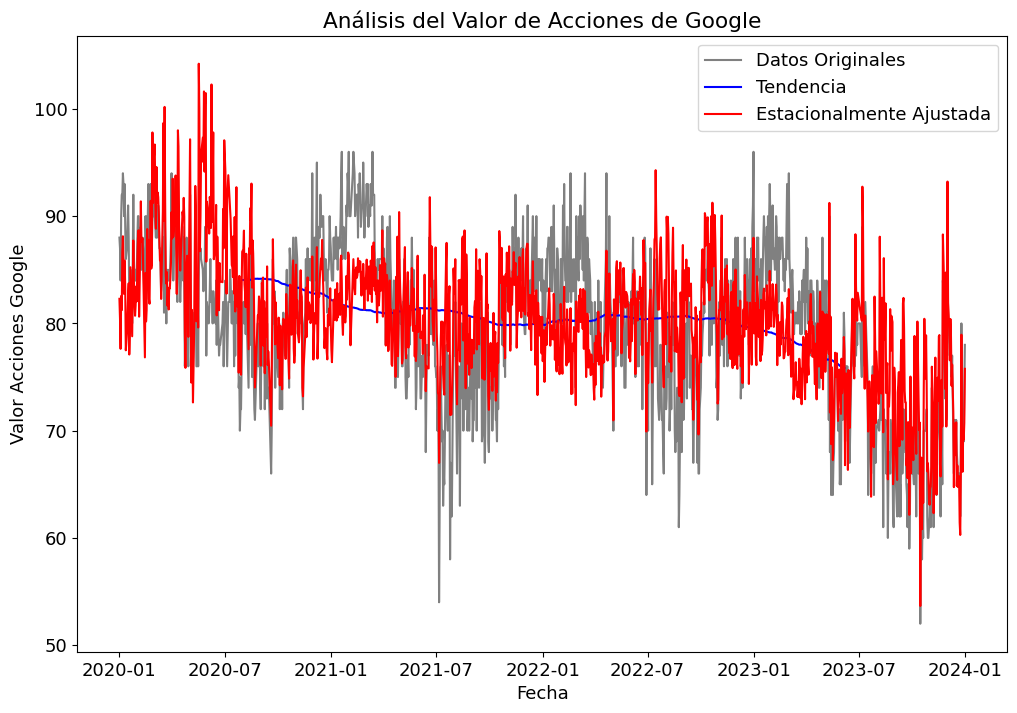

In [12]:
# Correct the seasonal adjustment for a multiplicative model
humidity_series_adjusted = humidity_series / mult_decomposition.seasonal

# Plotting
plt.figure(figsize=(12, 8))

# Serie original
plt.plot(humidity_series, label='Datos Originales', color='gray')

# Tendencia
plt.plot(mult_decomposition.trend, label='Tendencia', color='blue')

# Estacionalmente ajustada
plt.plot(humidity_series_adjusted, label='Estacionalmente Ajustada', color='red')

plt.xlabel('Fecha')
plt.ylabel('Valor Acciones Google')
plt.title('Análisis del Valor de Acciones de Google')
plt.legend()
plt.show()

## Partición en entrenamiento y test

Tomamos los datos desde 2020 hasta 2022 como entrenamiento y dejamos los de 2023 como test.

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba usando el índice
# Datos de entrenamiento: de 2020 a 2022
train_df = df.loc['2020-01-01':'2022-12-31',['Tavg', 'RH_avg']]

# Datos de prueba: año 2023
test_df = df.loc['2023-01-01':'2023-12-31',['Tavg', 'RH_avg']]

# Mostrar la forma (número de filas y columnas) del DataFrame de entrenamiento
train_df.shape

(1018, 2)

In [14]:
# Slicing the DataFrame to include only data from 2020-01-01 to 2022-12-31
S_temp_train = train_df['Tavg']
S_temp_test = test_df['Tavg']
S_hum_train = train_df['RH_avg']
S_hum_test = test_df['RH_avg']

### Métodos de suavizado exponencial
Encontrar el modelo de suavizado exponencial más adecuado, mostrando una tabla
con los estimadores de los parámetros del modelo elegido. Para dicho modelo,
representar gráficamente la serie observada y la suavizada con las predicciones para el periodo TEST. Mostrar una tabla con las predicciones

### Modelo 1: Alisado simple

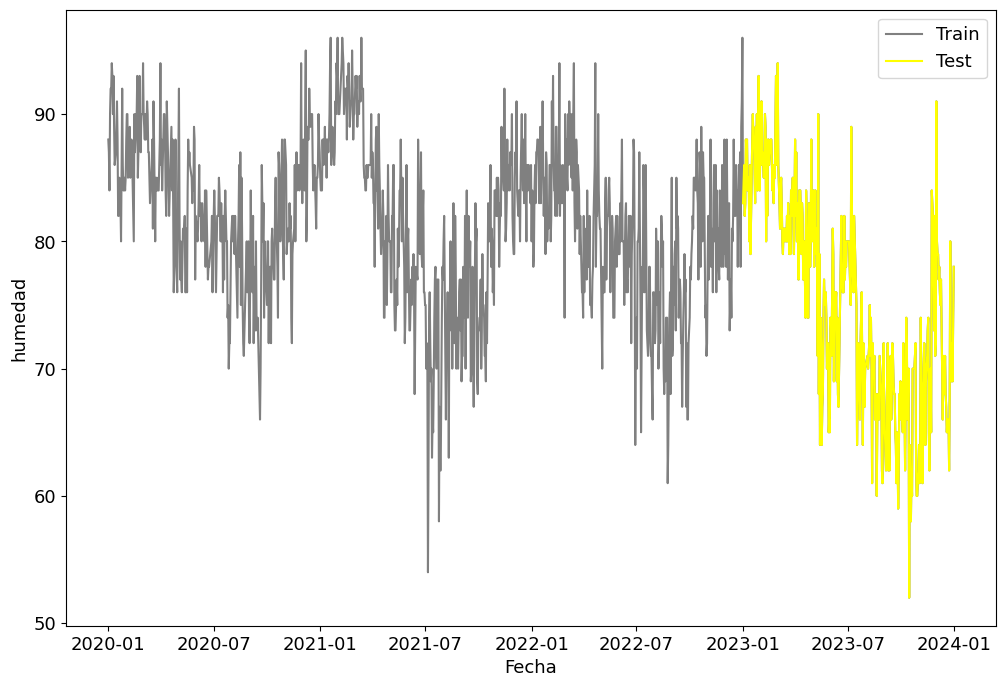

In [15]:
# Add legend and labels
plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_hum, label='Train', color='gray')
plt.plot(S_hum_test, label='Test', color='yellow')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('humedad')
# Show the plot
plt.show()

In [16]:
S_hum_train

Tanggal
2020-01-01    88
2020-01-02    87
2020-01-03    84
2020-01-04    90
2020-01-05    92
              ..
2022-12-27    87
2022-12-28    78
2022-12-29    89
2022-12-30    91
2022-12-31    96
Name: RH_avg, Length: 1018, dtype: int64

In [17]:
S_hum_test

Tanggal
2023-01-01    83
2023-01-03    86
2023-01-04    82
2023-01-05    83
2023-01-06    88
              ..
2023-12-27    69
2023-12-28    72
2023-12-29    69
2023-12-30    74
2023-12-31    78
Name: RH_avg, Length: 337, dtype: int64

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


337
Length of forecast: 337
Tanggal
2023-01-01    90.154238
2023-01-03    90.154238
2023-01-04    90.154238
2023-01-05    90.154238
2023-01-06    90.154238
                ...    
2023-12-27    90.154238
2023-12-28    90.154238
2023-12-29    90.154238
2023-12-30    90.154238
2023-12-31    90.154238
Length: 337, dtype: float64


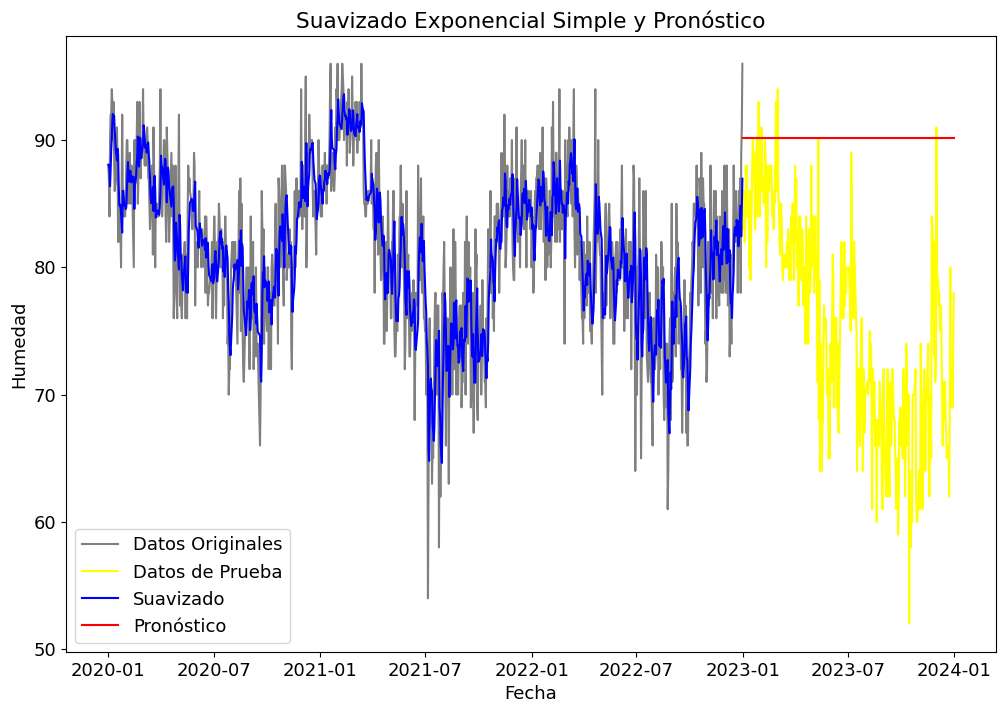

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(S_hum_train, initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_hum_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast = model.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series = pd.Series(fcast.values, index=S_hum_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_hum_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_hum_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

### Modelo 2: Modelo alisado doble de Holt

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


337
Length of forecast: 337
Tanggal
2023-01-01    90.160321
2023-01-03    90.162380
2023-01-04    90.164440
2023-01-05    90.166499
2023-01-06    90.168559
                ...    
2023-12-27    90.844083
2023-12-28    90.846143
2023-12-29    90.848202
2023-12-30    90.850262
2023-12-31    90.852321
Length: 337, dtype: float64


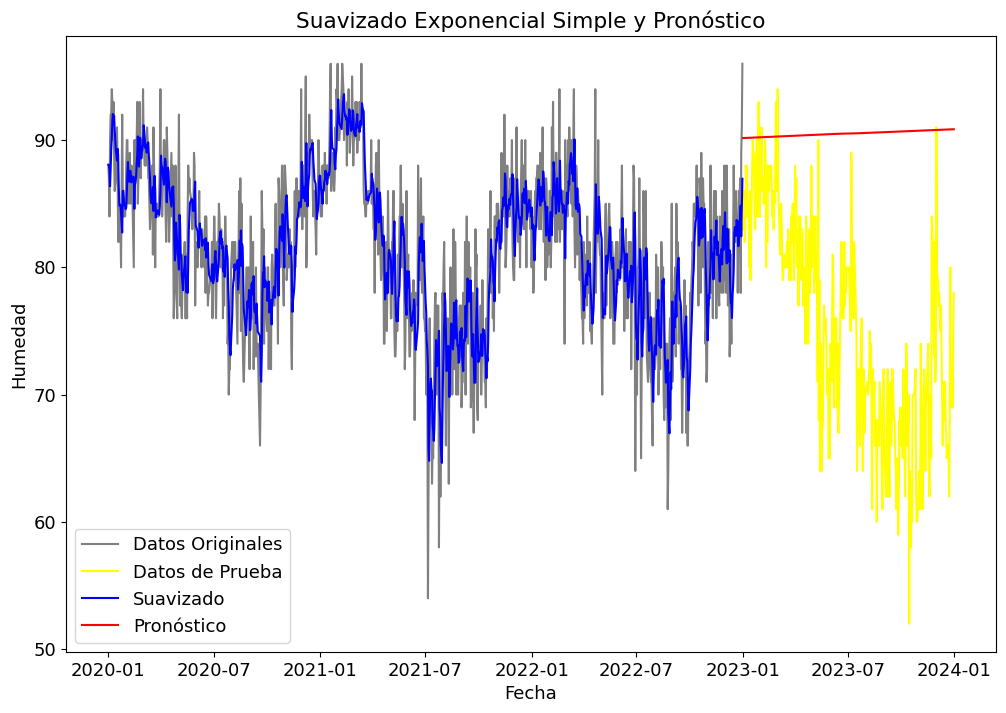

In [19]:
model1 = Holt(S_hum_train, initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_hum_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast1 = model1.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series = pd.Series(fcast1.values, index=S_hum_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_hum_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_hum_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

### Modelo 3: Método de tendencia amortiguada

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


337
Length of forecast: 337
Tanggal
2023-01-01    90.154297
2023-01-03    90.154297
2023-01-04    90.154297
2023-01-05    90.154297
2023-01-06    90.154297
                ...    
2023-12-27    90.154297
2023-12-28    90.154297
2023-12-29    90.154297
2023-12-30    90.154297
2023-12-31    90.154297
Length: 337, dtype: float64


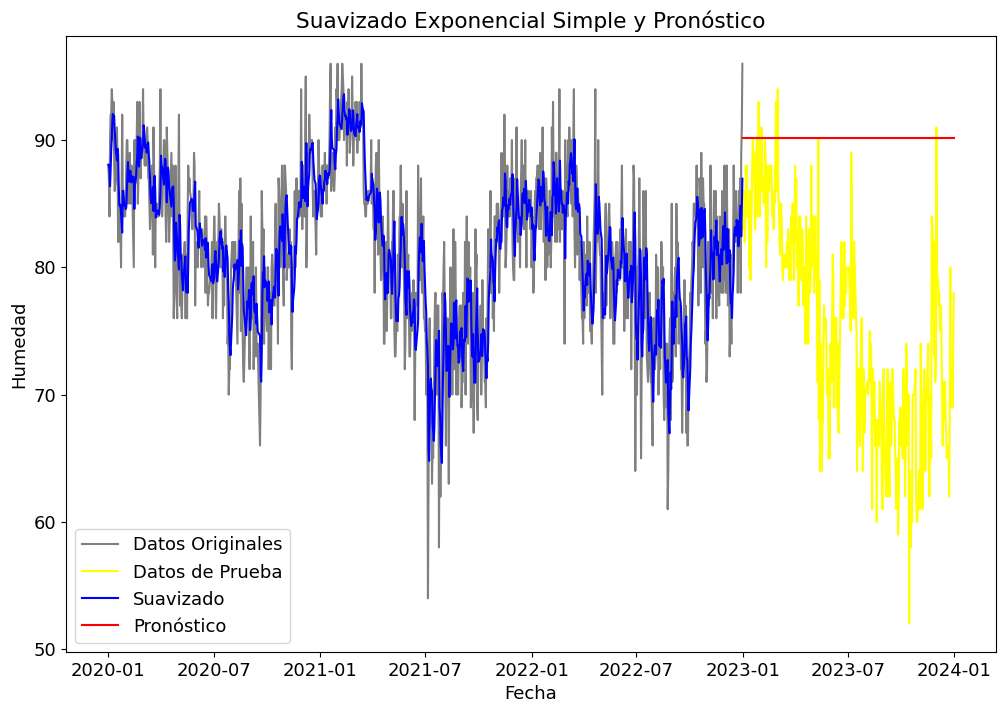

In [21]:
model2 = Holt(S_hum_train,damped_trend=True, initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_hum_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast2 = model2.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series = pd.Series(fcast2.values, index=S_hum_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_hum_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_hum_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()

### Modelo 4: Holt-Winters

c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


337
Length of forecast: 337
Tanggal
2023-01-01    91.371660
2023-01-03    89.902950
2023-01-04    93.937058
2023-01-05    96.473053
2023-01-06    88.007838
                ...    
2023-12-27    90.167334
2023-12-28    89.518354
2023-12-29    86.537278
2023-12-30    90.551836
2023-12-31    89.234918
Length: 337, dtype: float64


c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pablo\anaconda3\envs\forecasting_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


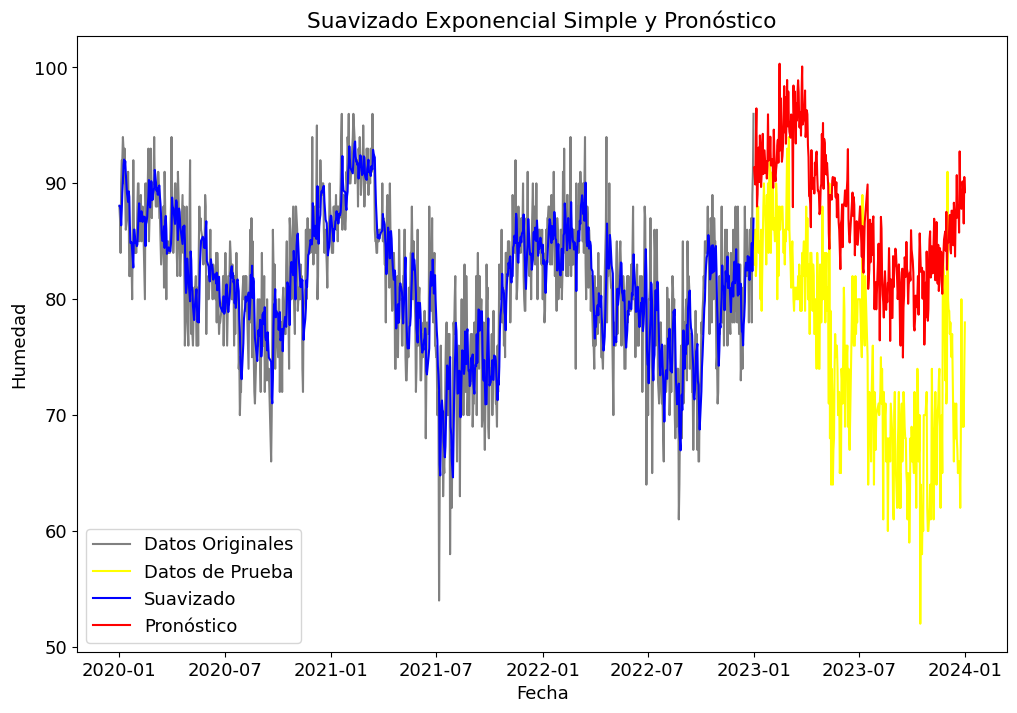

In [22]:
model2 = ExponentialSmoothing(S_hum_train, seasonal_periods=365,trend="add",
seasonal="add", initialization_method="estimated").fit()

# fcast_length es la longitud del pronóstico, que es igual al número de observaciones en S_hum_test.
fcast_length = len(S_hum_test)
print(fcast_length)
# Print the length of the forecast to confirm it's correct
print(f"Length of forecast: {fcast_length}")

# Generate the forecast using the model
fcast2 = model2.forecast(fcast_length)

# Since fcast is printed as a series with its own index, we need to reset it.
# The simplest way to align the forecast with S_hum_test is to ignore the original index of fcast.
fcast_series = pd.Series(fcast2.values, index=S_hum_test.index)

# Print the forecast series to confirm it's correctly aligned
print(fcast_series)

plt.figure(figsize=(12, 8))
# Serie original
plt.plot(S_hum_train, label='Datos Originales', color='gray')
# Datos de prueba (assuming 'S_google_high_test' is also correctly indexed)
plt.plot(S_hum_test, label='Datos de Prueba', color='yellow')
# Suavizado
plt.plot(model.fittedvalues, label='Suavizado', color='blue')
# Forecast
plt.plot(fcast_series, label='Pronóstico', color='red')

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Suavizado Exponencial Simple y Pronóstico')
plt.legend()
plt.show()